# Data source:
Ford GoBike System Data : https://www.fordgobike.com/system-data This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area .
I chose to analyse trips in 2019:8

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
trip_201908 = pd.read_csv('201908-baywheels-tripdata.csv')

In [3]:
trip_201908.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No
3,75682,2019-08-31 14:22:02.2780,2019-09-01 11:23:24.5110,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No
4,30849,2019-08-31 18:47:08.0570,2019-09-01 03:21:17.6970,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No


# Features :
The Features included in the Data are as follows :

- Member Year of Birth

- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude

# Questions we can answer 
1. What are types of users for ford bike system and distribution of each type
2. How long durations of trips in the system
3. what are differences in duraion of trips between user types
4. What are the stations that alot of trips start from
5. what are the stations that alot of trips end at 
6.  what are the most repeated trips 
7. what are types of bikes exist and distribution of each type
8. what type of bikes each user type use
9. which type of bikes is used for longer trips
10. what are times in the day that has most occuring trips 
11. what are the times each user type make a lot of trips

In [4]:
trip_201908.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210563 entries, 0 to 210562
Data columns (total 14 columns):
duration_sec               210563 non-null int64
start_time                 210563 non-null object
end_time                   210563 non-null object
start_station_id           210563 non-null int64
start_station_name         210563 non-null object
start_station_latitude     210563 non-null float64
start_station_longitude    210563 non-null float64
end_station_id             210563 non-null int64
end_station_name           210563 non-null object
end_station_latitude       210563 non-null float64
end_station_longitude      210563 non-null float64
bike_id                    210563 non-null int64
user_type                  210563 non-null object
bike_share_for_all_trip    210563 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 22.5+ MB


In [5]:
trip_201908.isnull().all().all()

False

We can see that there is no missing values in data

In [6]:
trip_201908.duplicated().all()

False

We can see that there is no duplication in rows of  data 

# Univariate Exploration

# What are types of users for ford bike system and distribution of each type


We can see that most of trips are done by subscriber user type , that 78% percent of customers are subscriber and 22% are customer user type

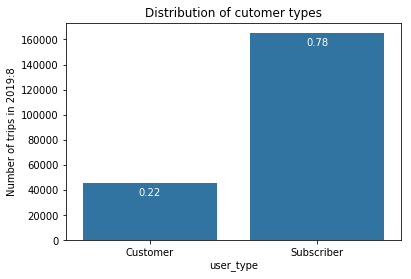

In [7]:
trips_num = trip_201908.shape[0]
max_proportion = trip_201908['user_type'].value_counts()[0]/trips_num
y_ticks = np.arange(0,max_proportion+0.1 ,0.1)
tick_names = ['{:0.2f}'.format(v) for v in y_ticks]

color = sb.color_palette()[0]

sb.countplot(data = trip_201908 , x = 'user_type' , color = color)
#plt.yticks(trips_num*y_ticks , tick_names)
plt.title('Distribution of cutomer types')
plt.ylabel("Number of trips in 2019:8")
pos,labels = plt.xticks()
for pos , label in zip(pos,labels):
    count = trip_201908['user_type'].value_counts()[label.get_text()]
    stringvalue = '{:0.02f}'.format(count/trips_num)
    plt.text(pos , count-10000 , stringvalue , ha = 'center', color = 'white')
    

In [8]:
trip_201908['duration_sec'].describe()

count    210563.00000
mean        833.51472
std        1928.22378
min          61.00000
25%         376.00000
50%         593.00000
75%         914.00000
max       85492.00000
Name: duration_sec, dtype: float64

In [9]:
#trip_201908['duration_sec'] = trip_201908['duration_sec']/60
x= trip_201908['duration_sec']/60

# How long durations of trips in the system

- we can see that we have outliers in data that there are some trips has durations very long with respect to general data trend
- aslo most of trips has short durations that most of trips has durations less than 2 hours and half
- if would lke to predict the duration of a trip with linear model it's better to apply logarithmic function first to data

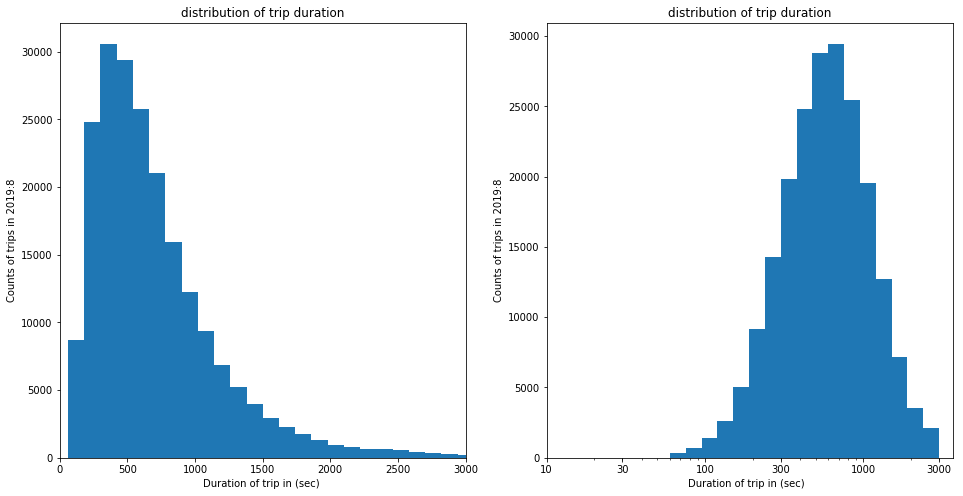

In [10]:
fig= plt.figure(figsize=(16,8));
plt.subplot(1 , 2 , 1);
x_bins = np.arange(61 ,3000+120 ,120  );
plt.hist( data = trip_201908 ,  x = 'duration_sec' , bins = x_bins );
plt.xlim((0,3000));
plt.title("distribution of trip duration");
plt.xlabel("Duration of trip in (sec) ");
plt.ylabel('Counts of trips in 2019:8');
plt.subplot(1 ,2 , 2);
bin_edges = 10 ** np.arange(np.log10(60), np.log10(3000)+0.1, 0.1);
plt.hist( data = trip_201908 ,  x = 'duration_sec' , bins = bin_edges );
plt.xscale('log');
tick_locs = [10, 30, 100, 300, 1000, 3000];
plt.xticks(tick_locs, tick_locs);
plt.title("distribution of trip duration");
plt.xlabel("Duration of trip in (sec)  ");
plt.ylabel('Counts of trips in 2019:8');

In [4]:

description = trip_201908['duration_sec'].describe()
Q3 =description['75%']
Q1 = description['25%']
IQR = Q3 -Q1
limit = Q3+1.5*IQR
limit

1721.0

In [5]:
trip_201908_clean = trip_201908[trip_201908['duration_sec']<=limit]

# What are types of users for ford bike system and distribution of each type

- We can see that most of trips are done by subscriber user type , that 81% percent of customers are subscriber and 19% are customer user type

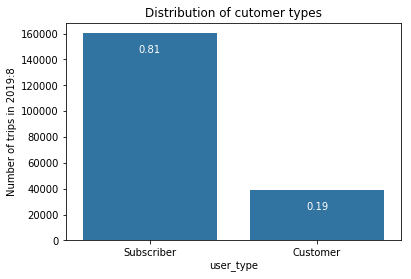

In [13]:
trips_num = trip_201908_clean.shape[0]
max_proportion = trip_201908_clean['user_type'].value_counts()[0]/trips_num
y_ticks = np.arange(0,max_proportion+0.1 ,0.1)
tick_names = ['{:0.2f}'.format(v) for v in y_ticks]

color = sb.color_palette()[0]

sb.countplot(data = trip_201908_clean , x = 'user_type' , color = color)
#plt.yticks(trips_num*y_ticks , tick_names)
plt.title('Distribution of cutomer types')
plt.ylabel("Number of trips in 2019:8")
pos,labels = plt.xticks()
for pos , label in zip(pos,labels):
    count = trip_201908_clean['user_type'].value_counts()[label.get_text()]
    stringvalue = '{:0.02f}'.format(count/trips_num)
    plt.text(pos , count-15000 , stringvalue , ha = 'center', color = 'white')
    

# What are the stations that alot of trips start from

In [46]:
start_name_counts = trip_201908_clean['start_station_name'].value_counts(normalize = False)
most_highest_start_stations = start_name_counts[start_name_counts>3000]
print(most_highest_start_stations)




San Francisco Caltrain Station 2  (Townsend St at 4th St)    5101
Berry St at 4th St                                           4005
Market St at 10th St                                         3460
San Francisco Ferry Building (Harry Bridges Plaza)           3196
Name: start_station_name, dtype: int64


We have 4 stations that users start their trips from oredered descending
1. San Francisco Caltrain Station 2  (Townsend St at 4th St) 
2. Berry St at 4th St
3. Market St at 10th St
4. San Francisco Ferry Building (Harry Bridges Plaza)

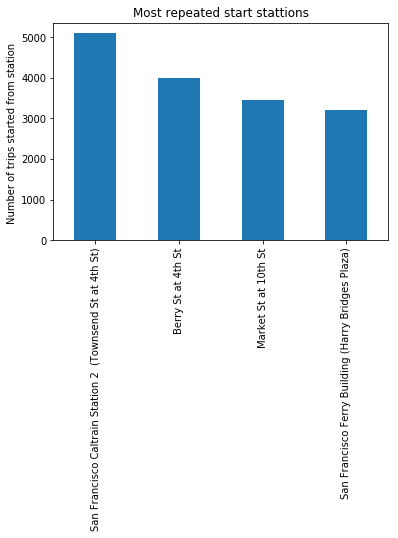

In [15]:
color = sb.color_palette()[0]
most_highest_start_stations.plot(kind = 'bar' , color =color , title = "Most repeated start stattions" );
plt.ylabel('Number of trips started from station ');

# what are the stations that alot of trips end at 

In [16]:
end_id_counts = trip_201908_clean['end_station_name'].value_counts()
most_highest_end_stations = end_id_counts[end_id_counts>3500]
most_highest_end_stations

San Francisco Caltrain Station 2  (Townsend St at 4th St)    7160
Montgomery St BART Station (Market St at 2nd St)             4162
San Francisco Ferry Building (Harry Bridges Plaza)           4143
Berry St at 4th St                                           3989
Name: end_station_name, dtype: int64

We have 4 stations that users end their trips at oredered descending

    1. San Francisco Caltrain Station 2  (Townsend St at 4th St)          . 7160
    2. Montgomery St BART Station (Market St at 2nd St)                     4162
    3. San Francisco Ferry Building (Harry Bridges Plaza)                   4143
    4. Berry St at 4th St                                                   3989


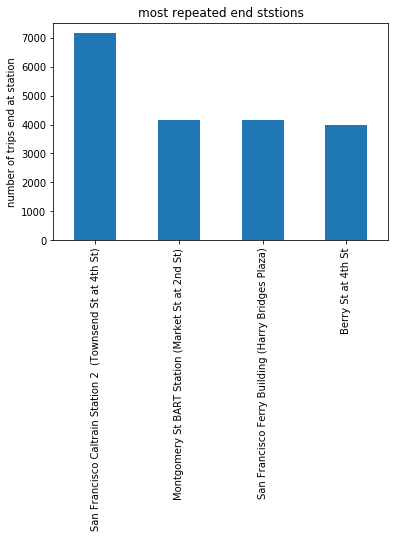

In [17]:
most_highest_end_stations.plot(kind = 'bar' , color = color ,title ="most repeated end ststions");
plt.ylabel("number of trips end at station");

# what are the most repeated trips

In [21]:
trip_201908_clean['trip'] = trip_201908_clean['start_station_name']+','+trip_201908_clean['end_station_name'];

In [22]:
trip_counts = trip_201908_clean['trip'].value_counts()
most_repeated_trips = trip_counts[trip_counts>500]

We have 2 trips that users make  more than any other trips 
    - from san francisco ferry building to embracadero at sansome 5t     .     512    
    - Berry 5t at 4th 5t to san francisco ferry building(Hsrry bridges plaza)  512

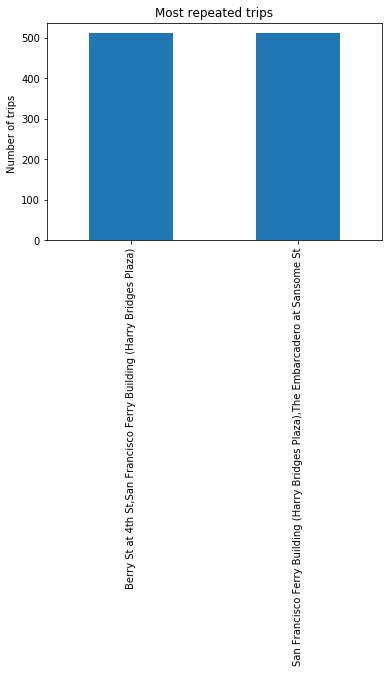

In [23]:
most_repeated_trips.plot(kind = 'bar' , color = color , title = "Most repeated trips")
plt.ylabel("Number of trips ");

#  what are types of bikes exist and distribution of each type

- We can see that 93% of bikes is not shared for all trips and the rest 7% are shared

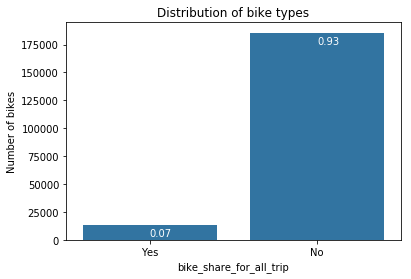

In [24]:
sb.countplot(data = trip_201908_clean , x= 'bike_share_for_all_trip' , color = color )
counts = trip_201908_clean['bike_share_for_all_trip'].value_counts()
plt.title("Distribution of bike types")
plt.ylabel("Number of bikes")
pos ,labels  = plt.xticks()
for pos, label in zip(pos,labels):
    count = counts[label.get_text()]

    percentage = count / trip_201908_clean.shape[0]
    percentage_str = '{:0.2f}'.format(percentage)
    plt.text(pos , count-10000 ,percentage_str ,color = 'white')

# what are the times in the day that has most occuring trips 

- Q1 represent first quarter of day 00:00 to 6:00 , Q2 represent second quarter of day 6:00 to 12:00 ,
-  Q3 represent third quarter of day 12:00 to 18:: Q4 represent forth quarter of day 18:00 to 24:00
- We can see that the most of trips (mpre than half) start through the day from 6:00  to 18:00  

In [14]:
trip_201908_clean['hour']=pd.to_datetime(trip_201908_clean['start_time']).dt.hour

In [12]:
def determine_quarter(x):
    if x>=0 and x<6:
        
        quarter = 'Q1'
    elif x>=6 and x<12:
        quarter = 'Q2'
    elif x>=12 and x<18 :
        quarter = 'Q3'
    else: quarter = 'Q4'
    return quarter

In [15]:
trip_201908_clean['day_quarter'] = trip_201908_clean['hour'].apply(lambda x :determine_quarter(x))

In [42]:
counts = trip_201908_clean['day_quarter'].value_counts(normalize =False)

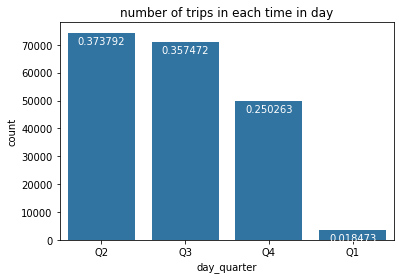

In [44]:
sb.countplot(data = trip_201908_clean , x = 'day_quarter' , color = color,order = ['Q2', 'Q3' ,'Q4' ,'Q1'])
trip_nums = trip_201908_clean.shape[0]
pos, labels = plt.xticks()
for pos , label in zip(pos, labels):
    count = counts[label.get_text()]
    percent_str = '{:2f}'.format(count/trip_nums)
    plt.text(pos , count-4000 , percent_str , color ='white', ha = 'center')
#plt.xticks(['6:00 to 12:00' , '12:00 to 18:00' , '18:00 to 24:00' , '00:00 to 6:00']);
plt.title("number of trips in each time in day");

# Bivariate Visualizations

# what are differences in duraion of trips between user types

- In general customer user types has more longer trip durations than subscriber 
- We can see that the distribution of subscriber users is more peaked at smaller trip durations between 180 seconds to 550 seconds with a few trips that has longer durations
- but cutomer user type has a lot of variability in trip duration


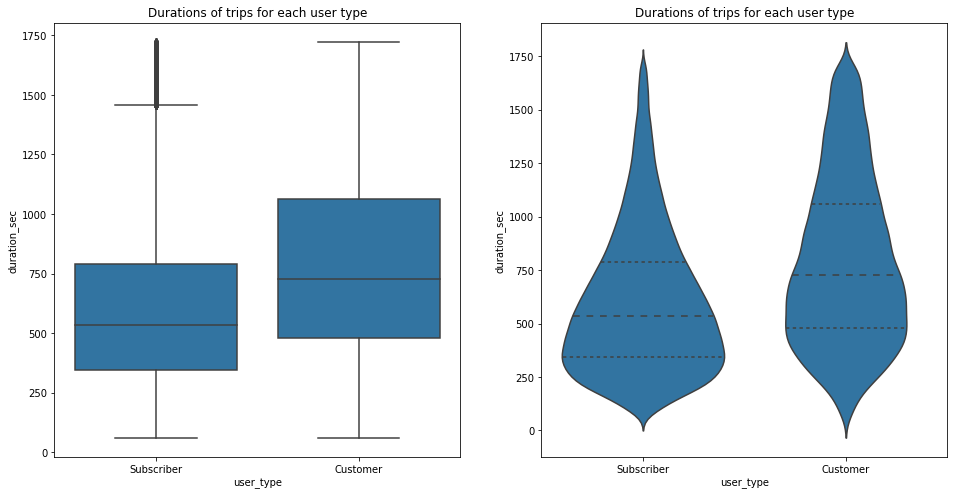

In [25]:
fig = plt.figure(figsize = (16 , 8));
plt.subplot(1 ,2 , 1);
sb.boxplot(data = trip_201908_clean , x = 'user_type' , y = 'duration_sec' , color = color);
plt.title("Durations of trips for each user type");
plt.subplot(1 , 2 , 2);
sb.violinplot(data = trip_201908_clean , x = 'user_type' , y = 'duration_sec' , color = color , inner = 'quartile');
plt.title("Durations of trips for each user type");

"\n    pos,labels = plt.xticks()\n    for pos , label in zip(pos,labels):\n        count = trip_201908_clean['start_station_id'].value_counts()[label.get_text()]\n        stringvalue = '{:0.02f}'.format(count/trips_num)\n        plt.text(pos , count-15000 , stringvalue , ha = 'center', color = 'white')\n    ##\n    "

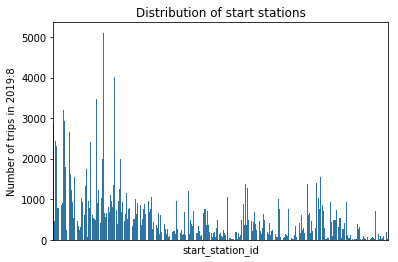

In [16]:
trips_num = trip_201908_clean.shape[0]
max_proportion = trip_201908_clean['start_station_id'].value_counts().max()

y_ticks = np.arange(0.0,max_proportion+0.1 ,0.1)
tick_names = ['{:0.2f}'.format(v) for v in y_ticks];

color = sb.color_palette()[0]

sb.countplot(data = trip_201908_clean , x = 'start_station_id' , color = color);
#plt.yticks(trips_num*y_ticks , tick_names)
plt.title('Distribution of start stations');
plt.ylabel("Number of trips in 2019:8");
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False); # labels along the bottom edge are off
#plt.xticks(rotation = 90)
"""
    pos,labels = plt.xticks()
    for pos , label in zip(pos,labels):
        count = trip_201908_clean['start_station_id'].value_counts()[label.get_text()]
        stringvalue = '{:0.02f}'.format(count/trips_num)
        plt.text(pos , count-15000 , stringvalue , ha = 'center', color = 'white')
    ##
    """

# what are types of bikes that each user type use

- In general there are preferences for non shared bikes for both customers and subscriber user types 
- The Shared bike program is not available to customers as they are able to pay more premium prices 

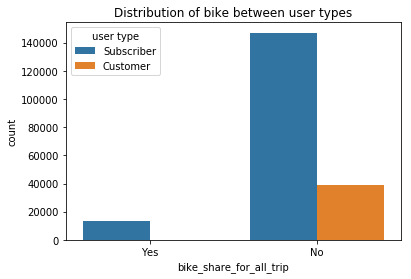

In [26]:
sb.countplot(data = trip_201908_clean , x= 'bike_share_for_all_trip' ,hue = "user_type" );
plt.legend(loc ="upper left" , title = "user type");
plt.title("Distribution of bike between user types");

# which type of bikes is used for longer trips

- We can see that the bikes that are not shared for all trips are used for  slightly longer trip duration than those are shared 

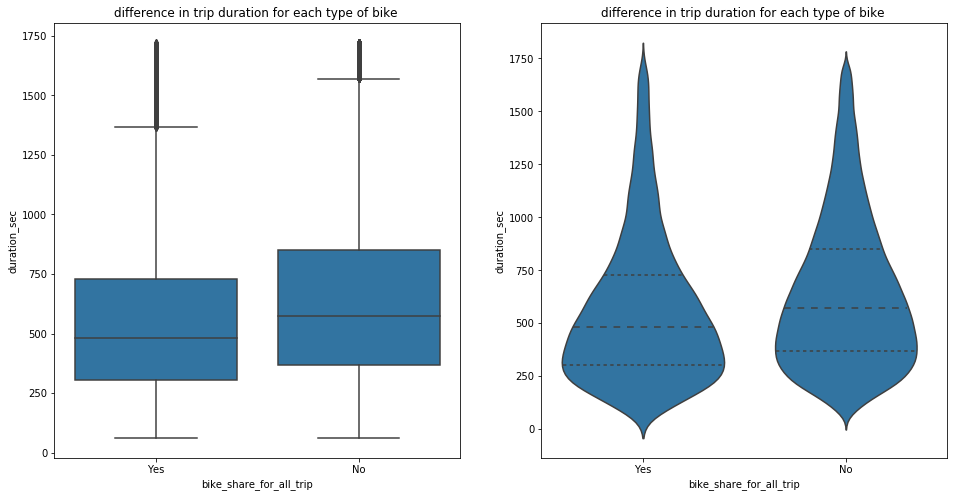

In [27]:
fig = plt.figure(figsize = (16 , 8));

plt.subplot(1 ,2 , 1);
plt.title("difference in trip duration for each type of bike ")
sb.boxplot(data = trip_201908_clean , x = 'bike_share_for_all_trip' , y = 'duration_sec' , color = color);

plt.subplot(1 , 2 , 2);
plt.title("difference in trip duration for each type of bike ")
sb.violinplot(data = trip_201908_clean , x = 'bike_share_for_all_trip' , y = 'duration_sec' , color = color , inner = 'quartile');

# what are the times each user type make a lot of trips

-  in general both types make more trips from 6:00 to 18:00 
- We can see that subscribe user type have more trips from 6:00  to 12:00  than any other time in the day but customer user type have more trips from 12:00  to 18:00


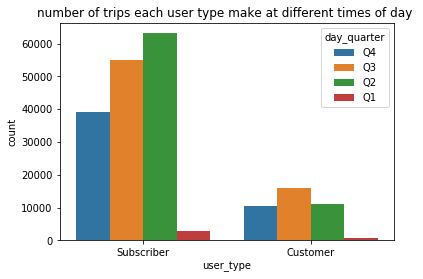

In [17]:
sb.countplot(data = trip_201908_clean , x = 'user_type' , hue = 'day_quarter');
plt.title("number of trips each user type make at different times of day ");

# Multivariate exploration

# What are durations of trips for each user and bike type 

- This plot emphasize that customer user types go for longer trips than subscribe user type
- also emphasize that bikes that are not shared for all trips are used for  slightly longer trip duration than those are shared 

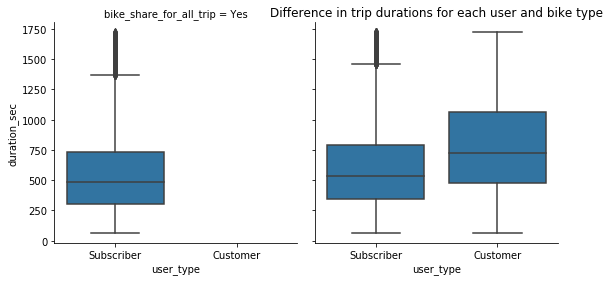

In [38]:
g = sb.FacetGrid(data = trip_201908_clean, col = 'bike_share_for_all_trip', size = 4 , margin_titles=True,legend_out=True);
g.map(sb.boxplot ,'user_type' ,'duration_sec' );
plt.title("Difference in trip durations for each user and bike type",loc= "center");

In [ ]:
!jupyter nbconvert "Exploration.ipynb" --to slides --post serve --template output_toggle